#Model Boosting and Optimization

###Demo 2: Implementing Gradient Boosting Using Python



# Problem Statment

Surverys were conducted on people living in different rural zones. Data was recorded on the basis of there lifetyle, assets, income and so on. The aim is to classify either the individual is depressed or not.


# Dataset

<b>Depressed.csv</b> is the dataset that contains various details of individuals along with there emotional status i.e. either they are depressed or not. The details recorded during the survey were:
- __Survey_id__: ID of the survey conducted
- __Ville_id__: Village ID where the survey was conducted(1-292)
- __sex__: Male or Female
- __Age__: Age of the individual(17-91)
- __Married__: Either the individual is married or not
- __Number_children__: Number of children the individual has(0-11)
- __education_level__: Education level(1-19)
- __total_members__: Total number of members in the family(1-12)
- __gained_asset__: Total assets gained(325K-99.1M)
- __durable_asset__: Total durable assets gained(163K-99.6M)
- __save_asset__: Assets saved(173K-99.9M)
- __living_expenses__: Expense of living(263K-99.3M)
- __other_expenses__: Other expenses(173K-99.8M)
- __Salaried__: Salaried or not
- __incoming_own_farm__: Does individual have a farm or not
- __incoming_business__: Any Business
- __incoming_agricultural__: Agricultural income(325K-99.8M)
- __farm_expenses__: Farming expenses(272K-99.7K)
- __lasting_investment__: Lasting investments(74.3K-99.4M)
- __no_lasting_investmen__: Non-Lasting investments(126K-99.6M)
- __depressed__: Either the individual is depressed or not

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

# Data Analysis

<div style="background-color:##EDF9FF">
  <ul><li><h3> Checking Data</h3></li></ul>
</div>

In [2]:
data=pd.read_csv('Depressed.csv')
data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,living_expenses,other_expenses,Salaried,incoming_own_farm,incoming_business,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen,depressed
0,926,91,Male,28,Married,4,10,5,28912201,22861940,...,26692283,28203066,Not Salaried,No,No,30028818,31363432,28411718,28292707.0,No
1,747,57,Male,23,Married,3,8,5,28912201,22861940,...,26692283,28203066,Not Salaried,No,No,30028818,31363432,28411718,28292707.0,Yes
2,1190,115,Male,22,Married,3,9,5,28912201,22861940,...,26692283,28203066,Not Salaried,No,No,30028818,31363432,28411718,28292707.0,No
3,1065,97,Male,27,Married,2,10,4,52667108,19698904,...,397715,44042267,Not Salaried,Yes,No,22288055,18751329,7781123,69219765.0,No
4,806,42,Female,59,Not Married,4,10,6,82606287,17352654,...,80877619,74503502,Salaried,No,No,53384566,20731006,20100562,43419447.0,No


In [3]:
data.shape

(1429, 21)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has 1429 rows and 21 columns </span>
</div>

In [4]:
data.describe(include='O')

,sex,Married,Salaried,incoming_own_farm,incoming_business,depressed
count,1429,1429,1429,1429,1429,1429
unique,2,2,2,2,2,2
top,Male,Married,Not Salaried,No,No,No
freq,1312,1104,1172,1069,1275,1191


In [5]:
data.describe()

,Survey_id,Ville_id,Age,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.409000e+03
mean,715.00000,76.286214,34.777467,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,2.742471e+07,3.248257e+07,3.366632e+07,3.451039e+07,3.549153e+07,3.299222e+07,3.360385e+07
std,412.66108,66.444012,13.986219,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,1.775137e+07,2.101528e+07,2.170266e+07,2.077846e+07,2.112372e+07,2.121621e+07,2.160228e+07
min,1.00000,1.000000,17.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,1.729660e+05,2.629190e+05,1.729660e+05,3.251120e+05,2.715050e+05,7.429200e+04,1.263120e+05
25%,358.00000,24.000000,25.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,2.339998e+07,2.088671e+07,2.098014e+07,2.322229e+07,2.279966e+07,2.001911e+07,2.064203e+07
50%,715.00000,57.000000,30.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,2.820307e+07,3.002882e+07,3.136343e+07,2.841172e+07,2.829271e+07
75%,1072.00000,105.000000,42.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,2.339998e+07,3.843689e+07,4.051889e+07,4.003842e+07,4.348584e+07,3.982686e+07,4.151762e+07
max,1429.00000,292.000000,91.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,9.992676e+07,9.929528e+07,9.982380e+07,9.978910e+07,9.965119e+07,9.944667e+07,9.965119e+07


<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [5]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
Survey_id,0,0.000000
Ville_id,0,0.000000
sex,0,0.000000
Age,0,0.000000
Married,0,0.000000
Number_children,0,0.000000
education_level,0,0.000000
total_members,0,0.000000
gained_asset,0,0.000000
durable_asset,0,0.000000


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has 20 null values in <b>no_lasting_investmen</b></span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Imputing Missing Values</h3></li></ul>
</div>

In [6]:
mean=data.no_lasting_investmen.mean()
data.no_lasting_investmen=data.no_lasting_investmen.fillna(mean)

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [7]:
target_ratio=pd.DataFrame({'Counts':data.depressed.value_counts(),'Percentage':data.depressed.value_counts()/len(data)})
target_ratio

,Counts,Percentage
depressed,,
No,1191,0.83345
Yes,238,0.16655


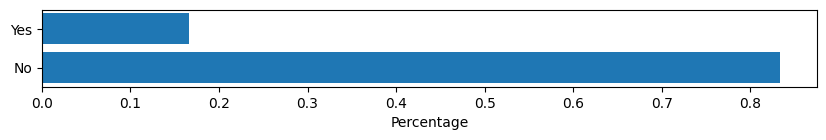

In [12]:
plt.figure(figsize = (10,1))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

<div style="background-color:##EDF9FF">
  <ul><li><h3>Encode Target Vairable</h3></li></ul>
</div>

In [8]:
lb=LabelEncoder()
data.depressed=lb.fit_transform(data.depressed)

In [9]:
lb.classes_

array(['No', 'Yes'], dtype=object)

<div style="background-color:##EDF9FF">
  <ul><li><h3>Scaling Data</h3></li></ul>
</div>

In [10]:
scale_cols=['Age','gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_agricultural',
       'farm_expenses', 'lasting_investment', 'no_lasting_investmen',]
data[scale_cols]=MinMaxScaler().fit_transform(data[scale_cols])

<div style="background-color:##EDF9FF">
  <ul><li><h3>Encode Binary Features</h3></li></ul>
</div>

In [11]:
cols=data.describe(include='O').columns
data[cols]=data[cols].apply(LabelEncoder().fit_transform)

<div style="background-color:##EDF9FF">
  <ul><li><h3>Selecting Features</h3></li></ul>
</div>

In [12]:
X=data.drop(['depressed','Survey_id','Ville_id'],axis=1)
y=data.depressed

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Data</h3></li></ul>
</div>

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=2,test_size=0.3)


# GradientBoostingClassifier

Following parameters should be considered before applying the classifier:
- __learning_rate__:`float`Contribution of each tree by default it is __0.1__.
- __n_estimator__:`int` Number of boosting stages to be performed by default it is 100. Large values can be used as Gradient Boosting is fairly robust to over-fitting.
For other parameters: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier'>GradientBoostingClassifier</a>

In [14]:
gb_clf=GradientBoostingClassifier(learning_rate=0.5,n_estimators=100)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
print(round(accuracy_score(y_test,gb_pred),3))

0.781


*__Conclusion__*: In this demonstration, we have learned how to apply Gradient Boosting.